In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
train = pd.read_csv("/Users/Srilakshmi/Downloads/train_kOBLwZA.csv")
test = pd.read_csv("/Users/Srilakshmi/Downloads/test_t02dQwI.csv") 

In [7]:
train_original=train.copy

In [8]:
test_original=test.copy

In [9]:
train["source"]="train"

In [10]:
test["source"]="test"

In [11]:
data=pd.concat([train,test],ignore_index=True)

/Users/Srilakshmi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
train.shape

(8523, 13)

In [13]:
test.shape

(5681, 12)

In [14]:
data.shape

(14204, 13)

In [15]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [16]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [17]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [18]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [19]:
data.apply(lambda x:len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [20]:
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"].head()
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food",
                                                          "NC":"Non-Consumable",
                                                          "DR":"Drinks"})
data["Item_Type_Combined"].value_counts()
data.drop(["Item_Type"],axis=1,inplace=True)

### Target Variable

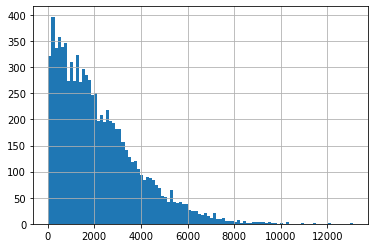

In [21]:
data["Item_Outlet_Sales"].hist(bins=100)

### Numeirc variables

#### Univariate Analysis- Numeircal

In [22]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
dtype: object

In [23]:
corr=numeric_features.corr()
corr

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [24]:
print(corr["Item_Outlet_Sales"].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


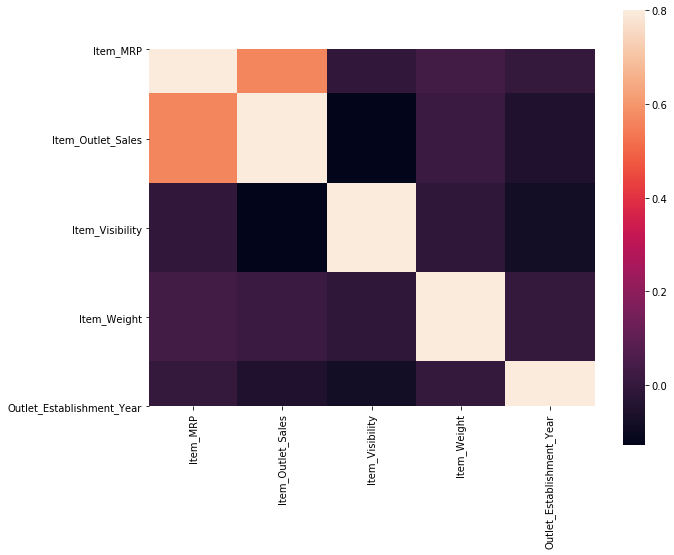

In [25]:
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr,vmax=0.8,square=True)

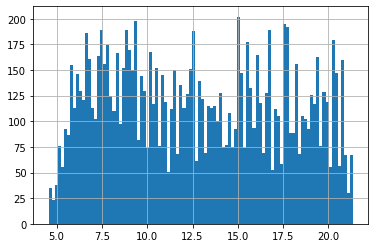

In [26]:
data["Item_Weight"].hist(bins=100)

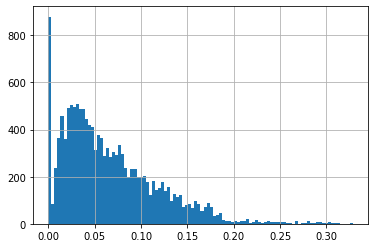

In [27]:
data["Item_Visibility"].hist(bins=100)

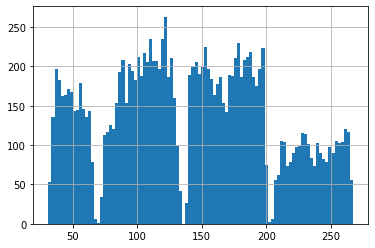

In [28]:
data["Item_MRP"].hist(bins=100)

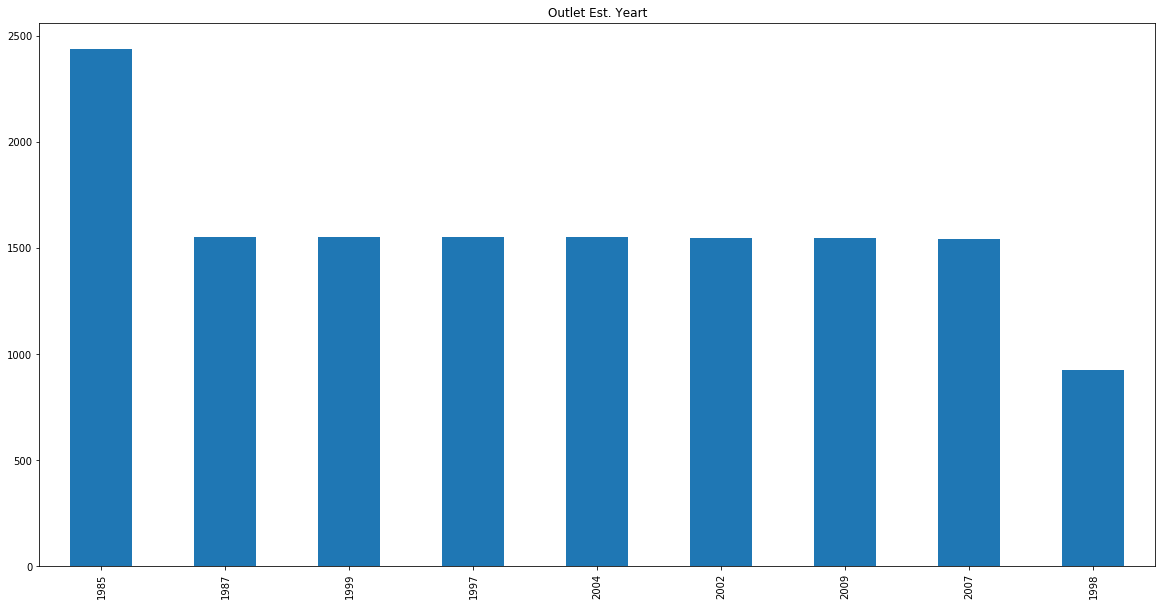

In [29]:
data["Outlet_Establishment_Year"].value_counts().plot.bar(figsize=(20,10),title="Outlet Est. Yeart")

#### Bivariate Analysis-Numerical

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Item_Outlet_Sales')

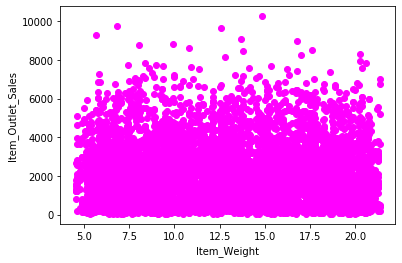

In [30]:
color=(1,0,1)
plt.scatter(data["Item_Weight"],data["Item_Outlet_Sales"],c=color)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Item_Outlet_Sales')

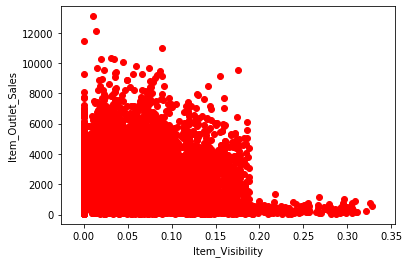

In [31]:
color=(1,0,0)
plt.scatter(data["Item_Visibility"],data["Item_Outlet_Sales"],c=color)
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Item_Outlet_Sales')

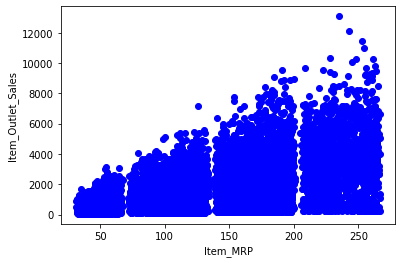

In [32]:
color=(0,0,1)
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"],c=color)
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")

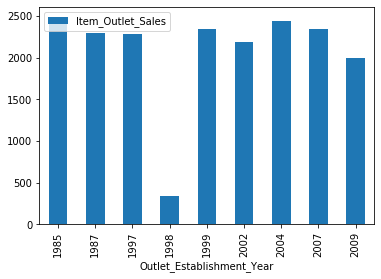

In [33]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Establishment_Year",aggfunc="mean").plot.bar()

### Categorical Variable

In [34]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']

In [35]:
categorical_columns

['Item_Fat_Content',
 'Item_Identifier',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'source',
 'Item_Type_Combined']

In [36]:
categorical_columns=[x for x in categorical_columns if x not in ["Item_Identifier","Outlet_Identifier","source"]]

In [37]:
categorical_columns

['Item_Fat_Content',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Item_Type_Combined']

In [38]:
for col in categorical_columns:
    print(data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64


In [39]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [40]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({"LF":"Low Fat",
                                                          "low fat":"Low Fat",
                                                          "reg":"Regular"})

In [41]:
data.loc[data["Item_Type_Combined"]=="Non-Consumable","Item_Fat_Content"]="Non-Edible"

In [42]:
data["Item_Fat_Content"].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

#### Univariate Analysis- Categorical

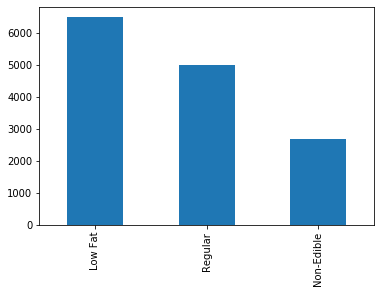

In [43]:
data["Item_Fat_Content"].value_counts().plot.bar()

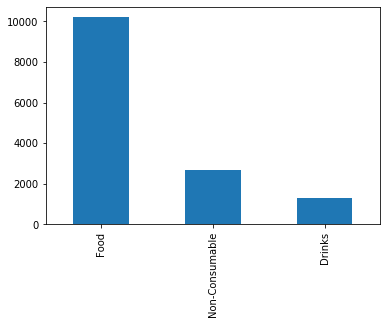

In [44]:
data["Item_Type_Combined"].value_counts().plot.bar()

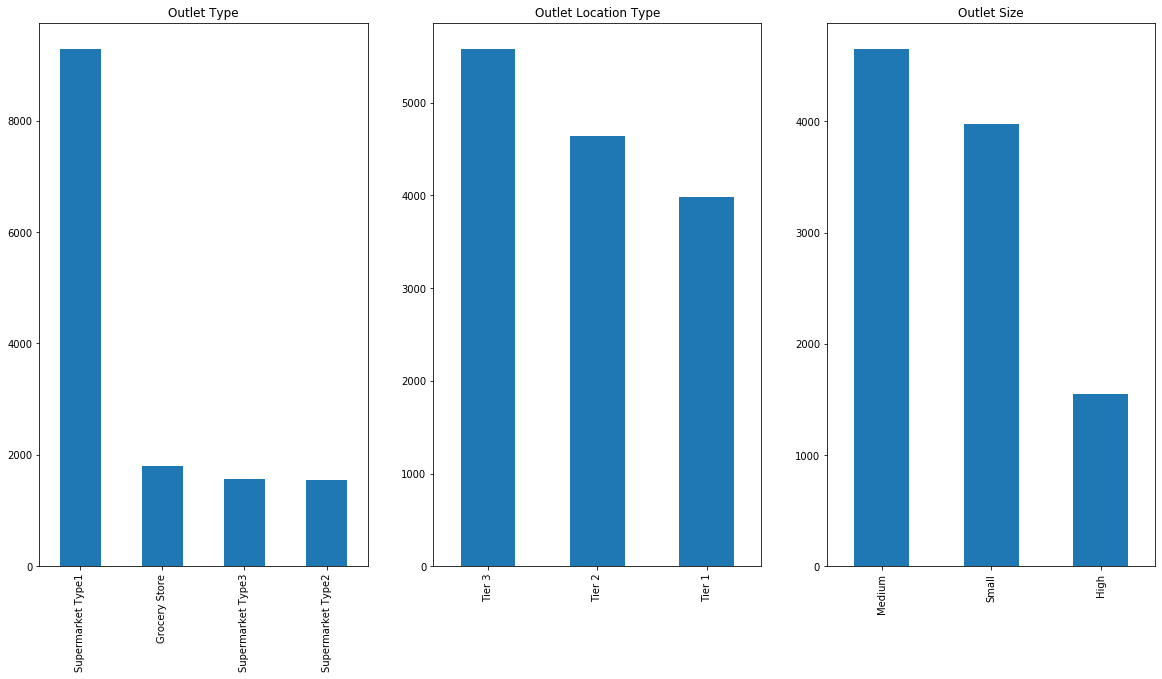

In [45]:
plt.figure(1)
plt.subplot(131)
data["Outlet_Type"].value_counts().plot.bar(figsize=(20,10),title="Outlet Type")
plt.subplot(132)
data["Outlet_Location_Type"].value_counts().plot.bar(figsize=(20,10),title="Outlet Location Type")
plt.subplot(133)
data["Outlet_Size"].value_counts().plot.bar(figsize=(20,10),title="Outlet Size")
plt.show()

#### Bivariarte Analysis- Categorical

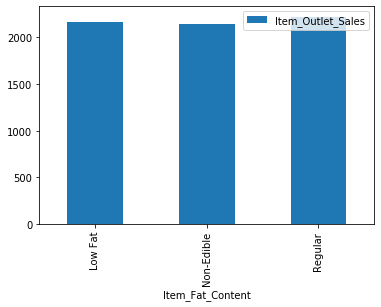

In [46]:
data.pivot_table(values="Item_Outlet_Sales",index="Item_Fat_Content",aggfunc="mean").plot.bar()

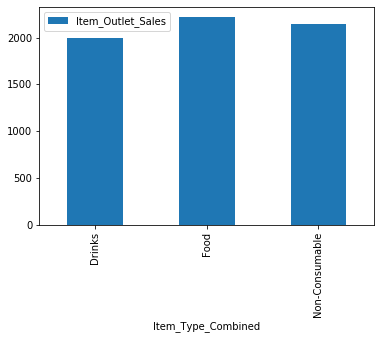

In [47]:
data.pivot_table(values="Item_Outlet_Sales",index="Item_Type_Combined",aggfunc="mean").plot.bar()

In [48]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Type",aggfunc="mean")

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


I wanted to make supermarket Type 2 and 3 as one category but after looking at the mean sales of both the catgories, it is evident that there is a significant differenc e betweem them. Therefore, I'll leave it like that only.

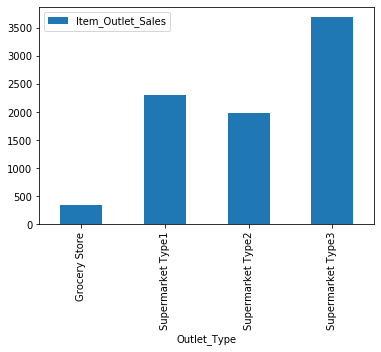

In [49]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Type",aggfunc="mean").plot.bar()

In [50]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Location_Type",aggfunc="mean")

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


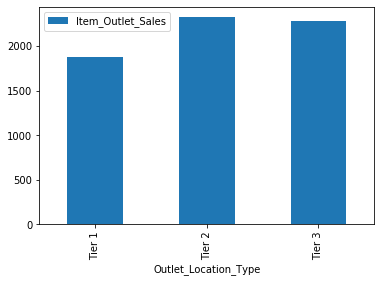

In [51]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Location_Type",aggfunc="mean").plot.bar()

In [52]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Size",aggfunc="mean")

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2681.603542
Small,1912.149161


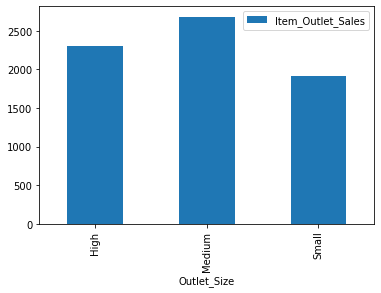

In [53]:
data.pivot_table(values="Item_Outlet_Sales",index="Outlet_Size",aggfunc="mean").plot.bar()

### Missing Value and Outliers:

In [54]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
Item_Type_Combined              0
dtype: int64

In [55]:
item_avg_weight= data.pivot_table(values="Item_Weight",index="Item_Identifier")

In [56]:
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [57]:
missing_val=data["Item_Weight"].isnull()

In [58]:
missing_val.value_counts()

False    11765
True      2439
Name: Item_Weight, dtype: int64

In [59]:
sum(missing_val)

2439

In [60]:
data.loc[missing_val,"Item_Weight"]=data.loc[missing_val,"Item_Identifier"].apply(lambda x: item_avg_weight.loc[x])

In [61]:
sum(data["Item_Weight"].isnull())

0

In [62]:
from scipy.stats import mode

In [63]:
outlet_size_mode=data.pivot_table(values="Outlet_Size",index="Outlet_Type",aggfunc=(lambda x:mode(x).mode[0]))

In [64]:
outlet_size_mode

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [65]:
missing_val_size=data["Outlet_Size"].isnull()

In [66]:
missing_val_size.head()

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool

In [67]:
data.loc[missing_val_size,"Outlet_Size"]=data.loc[missing_val_size,"Outlet_Type"].apply(lambda x: outlet_size_mode.loc[x])

In [68]:
sum(data["Outlet_Size"].isnull())

0

### Feature Eng.

In [69]:
visibility_avg= data.pivot_table(values="Item_Visibility",index="Item_Identifier")

In [70]:
visibility_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [71]:
missing_vis=(data["Item_Visibility"]==0)

In [72]:
sum(missing_vis)

879

In [73]:
data.loc[missing_vis,"Item_Visibility"]=data.loc[missing_vis,"Item_Identifier"].apply(lambda x:visibility_avg.loc[x])

In [74]:
sum(data["Item_Visibility"]==0)

0

In [75]:
data["Item_Vis_MeanRatio"]=data.apply(lambda x: x["Item_Visibility"]/visibility_avg.loc[x["Item_Identifier"]],axis=1)

In [76]:
data["Item_Vis_MeanRatio"].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Vis_MeanRatio, dtype: float64

In [77]:
data.shape

(14204, 14)

In [78]:
data["Outlet_Years"]=2013-data["Outlet_Establishment_Year"]

In [79]:
data["Outlet_Years"].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

##### One-Hot Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()

In [82]:
data["Outlet"]=le.fit_transform(data["Outlet_Identifier"])

In [83]:
data["Outlet"].head()

0    9
1    3
2    9
3    0
4    1
Name: Outlet, dtype: int64

In [84]:
data["Item_I"]=le.fit_transform(data["Item_Identifier"])

In [85]:
var_mod=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Outlet","Item_Type_Combined"]

In [86]:
le=LabelEncoder()

In [87]:
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [88]:
data["Item_Type_Combined"].head()

0    1
1    0
2    1
3    1
4    2
Name: Item_Type_Combined, dtype: int64

In [89]:
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Outlet","Item_Type_Combined"])

In [90]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Vis_MeanRatio,Outlet_Years,...,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,1,0,1,0
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,1,0,0,0,0,0,0,1,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,1,0,1,0
3,FDX07,182.0950,732.3800,0.017834,19.20,1998,OUT010,train,1.000000,15,...,0,0,0,0,0,0,0,0,1,0
4,NCD19,53.8614,994.7052,0.009780,8.93,1987,OUT013,train,1.000000,26,...,0,0,0,0,0,0,0,0,0,1


In [91]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Vis_MeanRatio           float64
Outlet_Years                   int64
Item_I                         int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

In [92]:
data[["Item_Fat_Content_0","Item_Fat_Content_1","Item_Fat_Content_2"]].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [93]:
data.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)

In [94]:
data.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [95]:
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

In [96]:
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)

/Users/Srilakshmi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
train.drop(["source"],axis=1,inplace=True)

In [98]:
train.to_csv("train_modified.csv",index=False)

In [99]:
test.to_csv("test_modified.csv",index=False)

In [100]:
tt=pd.read_csv("train_modified.csv")

In [101]:
tt.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Vis_MeanRatio,Outlet_Years,Item_I,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,249.8092,3735.1380,0.016047,9.30,0.931078,14,156,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,48.2692,443.4228,0.019278,5.92,0.933420,4,8,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,141.6180,2097.2700,0.016760,17.50,0.960069,14,662,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,182.0950,732.3800,0.017834,19.20,1.000000,15,1121,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,53.8614,994.7052,0.009780,8.93,1.000000,26,1297,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Linear Regression

#### Model 1

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
from pandas import Series

In [104]:
from pandas import DataFrame

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
train_modified=pd.read_csv("train_modified.csv")

In [107]:
test_modified=pd.read_csv("test_modified.csv")

In [108]:
lreg=LinearRegression()

In [109]:
X=train_modified.loc[:,["Outlet_Years","Item_MRP"]]


In [110]:
X_train_modified,X_cv,y_train_modified,y_cv=train_test_split(X,train_modified.Item_Outlet_Sales)

In [111]:
lreg.fit(X_train_modified,y_train_modified)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
prediction=lreg.predict(X_cv)

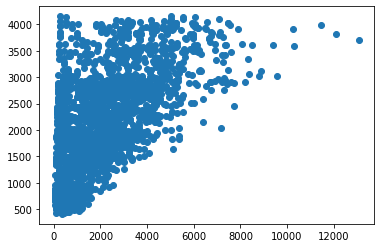

In [113]:
plt.scatter(y_cv,prediction)

In [114]:
mse=np.mean((prediction-y_cv)**2)

In [115]:
mse

1929530.5806044599

In [116]:
coeff=DataFrame(X_train_modified.columns)

In [117]:
coeff

,0
0,Outlet_Years
1,Item_MRP


In [118]:
coeff["Coefficient_Estimate"]=Series(lreg.coef_)

In [119]:
coeff

,0,Coefficient_Estimate
0,Outlet_Years,7.609915
1,Item_MRP,15.311844


MRP has high coefficient, which means that items having higher prices have better sales.

In [120]:
lreg.score(X_cv,y_cv)

0.3482861139930557

#### Model 2

In [121]:
X= train_modified.loc[:,["Item_MRP","Outlet_Years","Item_Weight"]]

In [122]:
X_train,X_cv,y_train,y_cv=train_test_split(X,train_modified.Item_Outlet_Sales)

In [123]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
prediction=lreg.predict(X_cv)

In [125]:
mse=np.mean((prediction-y_cv)**2)

In [126]:
mse

2010465.0317424587

In [127]:
coeff=DataFrame(X_train.columns)

In [128]:
coeff

,0
0,Item_MRP
1,Outlet_Years
2,Item_Weight


In [129]:
coeff["Coeffiecient_Estimate"]=Series(lreg.coef_)

In [130]:
coeff

,0,Coeffiecient_Estimate
0,Item_MRP,15.525260
1,Outlet_Years,9.876408
2,Item_Weight,1.204618


In [131]:
lreg.score(X_cv,y_cv)

0.32348259740970364

##### Building the model

In [132]:
X=train_modified.drop("Item_Outlet_Sales",1)

In [133]:
X_train,X_cv,y_train,y_cv=train_test_split(X,train_modified.Item_Outlet_Sales,test_size=0.3)

In [134]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
prediction_cv=lreg.predict(X_cv)

In [136]:
mse=np.mean((prediction_cv-y_cv)**2)

In [137]:
mse #MSE

1272260.3982634076

In [138]:
lreg.score(X_cv,y_cv) #R-Square Score

0.560744374505983

By including all the predictor varibales, this model's accuracy got better. It can clearly be seen by the decreased MSE and increased R-Square Score as compared to earlier models.